In [3]:
import math
import meep as mp
from meep import mpb

import numpy as np
import matplotlib.pyplot as plt

In [20]:
#屈折率
n_Air = 1
n_Si = 2.6

r = 1/10

#三角形の一辺
s = 0.3

#穴シフト
R = 1

#計算する固有周波数の数
num_bands = 10

#メッシュの細かさ
resolution = 64

h = 20

#-------------------------------------------------------------------#

#単位格子
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1),
                              basis1=mp.Vector3(1./2, np.sqrt(3)/2),
                              basis2=mp.Vector3(1./2, -np.sqrt(3)/2))

#三角形
s_param = s/(np.sqrt(3))

# ▷
tri1 = [
        mp.Vector3(-1,-1)*s_param,
        mp.Vector3(1,0)*s_param,
        mp.Vector3(0,1)*s_param
      ]

# ◁
tri2 = [
        mp.Vector3(1,1)*s_param,
        mp.Vector3(-1,0)*s_param,
        mp.Vector3(0,-1)*s_param
      ]

#構造
geometry = [
            mp.Block(material=mp.Medium(epsilon=n_Si**2),
                        size=mp.Vector3(mp.inf, mp.inf)),

            mp.Prism(tri1, center=mp.Vector3(1/3, 1/3)*R, height=h,
                        material=mp.Medium(epsilon=n_Air**2)),
            
            mp.Prism(tri2, center=mp.Vector3(1/3, 0)*R, height=h,
                        material=mp.Medium(epsilon=n_Air**2)),

            mp.Prism(tri1, center=mp.Vector3(0, -1/3)*R, height=h,
                        material=mp.Medium(epsilon=n_Air**2)),

            mp.Prism(tri2, center=mp.Vector3(-1/3, -1/3)*R, height=h,
                        material=mp.Medium(epsilon=n_Air**2)),

            mp.Prism(tri1, center=mp.Vector3(-1/3, 0)*R, height=h,
                        material=mp.Medium(epsilon=n_Air**2)),
    
            mp.Prism(tri2, center=mp.Vector3(0, 1/3)*R, height=h,
                        material=mp.Medium(epsilon=n_Air**2))
    
           ]


#ブリルアンゾーン
k_points = [
    mp.Vector3(),               # Gamma
    mp.Vector3(1./2, 0),          # M
    mp.Vector3(1./3, 1./3),    # K
    mp.Vector3(),               # Gamma
]
k_points = mp.interpolate(8, k_points)

In [21]:
#計算
ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    resolution=resolution,
    num_bands=num_bands
)

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(-1./3, 1./3),
                               mpb.fix_efield_phase,
                               mpb.output_efield_z))
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list
ms.run_te()
te_freqs = ms.all_freqs
te_gaps = ms.gap_list

Initializing eigensolver data
Computing 10 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 64 x 64 x 1.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.5, 0.866025, 0)
     (0.5, -0.866025, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (1, 0.57735, -0)
     (1, -0.57735, 0)
     (-0, 0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1e+20,0)
          axes (1,0,0), (0,1,0), (0,0,1)
     prism, center = (0.333333,0.333333,0)
          height 20, axis (0,0,1), sidewall angle: 0 radians, 3 vertices:
          (0.160128,0.160128,-10)
          (0.506538,0.333333,-10)
          (0.333333,0.506538,-10)
     prism, center = (0.333333,0,0)
          height 20, axis (0,0,1), sidewall angle: 0 radians, 3 vertices:
          (0.506538,0.173205,-10)
          (0.160128,0,-10)
          (0.333333,-0.173205,-10)
     prism, center = (0,-0.333333,0)
          height 20, ax

Solving for bands 1 to 10...
Finished solving for bands 1 to 10 after 5 iterations.
tmfreqs:, 17, 0.37037, 0.259259, 0, 0.632889, 0.275822, 0.275834, 0.321894, 0.545213, 0.590485, 0.590502, 0.721809, 0.721882, 0.721916, 0.790327
elapsed time for k point: 0.09051704406738281
solve_kpoint (0.351852,0.296296,0):
Solving for bands 1 to 10...
Finished solving for bands 1 to 10 after 5 iterations.
tmfreqs:, 18, 0.351852, 0.296296, 0, 0.648941, 0.282715, 0.282727, 0.306149, 0.560175, 0.582688, 0.582706, 0.724268, 0.726172, 0.726277, 0.79228
elapsed time for k point: 0.10971188545227051
solve_kpoint (0.333333,0.333333,0):
Solving for bands 1 to 10...
Finished solving for bands 1 to 10 after 6 iterations.
tmfreqs:, 19, 0.333333, 0.333333, 0, 0.666667, 0.290309, 0.290326, 0.290326, 0.575103, 0.575113, 0.575129, 0.726935, 0.726937, 0.72705, 0.794448
elapsed time for k point: 0.11688828468322754
solve_kpoint (0.296296,0.296296,0):
Solving for bands 1 to 10...
Finished solving for bands 1 to 10 aft

Solving for bands 2 to 10...
Finished solving for bands 2 to 10 after 22 iterations.
tefreqs:, 1, 0, 0, 0, 0, 0, 0.518241, 0.518372, 0.519557, 0.519773, 0.624586, 0.625263, 0.845841, 0.861692, 0.974796
elapsed time for k point: 0.3099033832550049
solve_kpoint (0.0555556,0,0):
Solving for bands 1 to 10...
Finished solving for bands 1 to 10 after 15 iterations.
tefreqs:, 2, 0.0555556, 0, 0, 0.06415, 0.0307188, 0.499147, 0.502895, 0.531543, 0.537022, 0.627675, 0.62939, 0.843329, 0.858636, 0.974624
elapsed time for k point: 0.23124480247497559
solve_kpoint (0.111111,0,0):
Solving for bands 1 to 10...
Finished solving for bands 1 to 10 after 14 iterations.
tefreqs:, 3, 0.111111, 0, 0, 0.1283, 0.0614259, 0.475429, 0.487895, 0.536978, 0.555811, 0.635404, 0.64176, 0.835963, 0.850207, 0.973499
elapsed time for k point: 0.22117209434509277
solve_kpoint (0.166667,0,0):
Solving for bands 1 to 10...
Finished solving for bands 1 to 10 after 13 iterations.
tefreqs:, 4, 0.166667, 0, 0, 0.19245, 0.0921

Solving for bands 2 to 10...
Finished solving for bands 2 to 10 after 10 iterations.
tefreqs:, 28, 0, 0, 0, 0, 0, 0.518241, 0.518372, 0.519557, 0.519773, 0.624586, 0.625263, 0.845841, 0.861692, 0.974796
elapsed time for k point: 0.13247060775756836
Band 1 range: 0.0 at Vector3<0.0, 0.0, 0.0> to 0.3151840882689833 at Vector3<0.3333333333333333, 0.3333333333333333, 0.0>
Band 2 range: 0.2748645957119621 at Vector3<0.5, 0.0, 0.0> to 0.5182414033746305 at Vector3<0.0, 0.0, 0.0>
Band 3 range: 0.3163952566137437 at Vector3<0.3333333333333333, 0.3333333333333333, 0.0> to 0.5183722653044116 at Vector3<0.0, 0.0, 0.0>
Band 4 range: 0.5195573803410659 at Vector3<0.0, 0.0, 0.0> to 0.6388024061840675 at Vector3<0.3333333333333333, 0.3333333333333333, 0.0>
Band 5 range: 0.5197728108893596 at Vector3<0.0, 0.0, 0.0> to 0.7061680222129348 at Vector3<0.5, 0.0, 0.0>
Band 6 range: 0.6245858461013938 at Vector3<0.0, 0.0, 0.0> to 0.7308848638566476 at Vector3<0.2222222222222222, 0.2222222222222222, 0.0>
Band

In [22]:
#import csv
#with open('epsilon_distribution.csv', 'wt') as f:
#    writer = csv.writer(f)
#    writer.writerows(converted_eps)

epsilon: 1-6.76, mean 5.2051, harm. mean 2.82058, 78.7598% > 1, 73.0052% "fill"


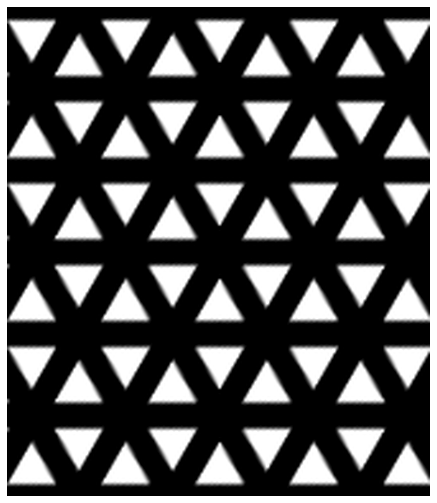

In [23]:
md = mpb.MPBData(rectify=True, periods=3, resolution=64)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)
converted_eps.shape

plt.figure(figsize=(12,9))
plt.imshow(converted_eps, interpolation='spline36', cmap="binary")
plt.axis('off')
plt.show()

In [24]:
tm_freqs.max()

0.850045830879146

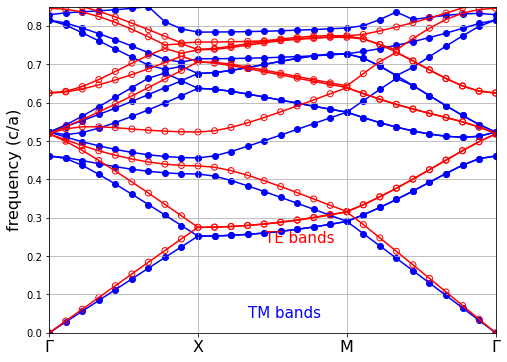

In [25]:
fig, ax = plt.subplots(figsize=(8,6))

x = range(len(tm_freqs))

# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
for xz, tmz, tez in zip(x, tm_freqs, te_freqs):
    ax.scatter([xz]*len(tmz), tmz, color='blue')
    ax.scatter([xz]*len(tez), tez, color='red', facecolors='none')
ax.plot(tm_freqs, color='blue')
ax.plot(te_freqs, color='red')
ax.set_ylim([tm_freqs.min(), tm_freqs.max()])
ax.set_xlim([x[0], x[-1]])

# Plot gaps
for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

for gap in te_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(12, 0.04, 'TM bands', color='blue', size=15)
ax.text(13.05, 0.235, 'TE bands', color='red', size=15)

points_in_between = (len(tm_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'X', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)

plt.show()

Initializing eigensolver data
Computing 10 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 64 x 64 x 1.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.5, 0.866025, 0)
     (0.5, -0.866025, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (1, 0.57735, -0)
     (1, -0.57735, 0)
     (-0, 0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1e+20,0)
          axes (1,0,0), (0,1,0), (0,0,1)
     prism, center = (0.333333,0.333333,0)
          height 20, axis (0,0,1), sidewall angle: 0 radians, 3 vertices:
          (0.160128,0.160128,-10)
          (0.506538,0.333333,-10)
          (0.333333,0.506538,-10)
     prism, center = (0.333333,0,0)
          height 20, axis (0,0,1), sidewall angle: 0 radians, 3 vertices:
          (0.506538,0.173205,-10)
          (0.160128,0,-10)
          (0.333333,-0.173205,-10)
     prism, center = (0,-0.333333,0)
          height 20, ax

tefreqs:, 14, 0.425926, 0.148148, 0, 0.596055, 0.283164, 0.283755, 0.396451, 0.561062, 0.680491, 0.684752, 0.755642, 0.759722, 0.760962, 0.937225
elapsed time for k point: 0.1566767692565918
solve_kpoint (0.407407,0.185185,0):
Solving for bands 1 to 10...
Finished solving for bands 1 to 10 after 6 iterations.
tefreqs:, 15, 0.407407, 0.185185, 0, 0.606322, 0.287816, 0.288539, 0.38118, 0.575905, 0.672098, 0.676457, 0.761277, 0.762731, 0.765481, 0.938118
elapsed time for k point: 0.12520813941955566
solve_kpoint (0.388889,0.222222,0):
Solving for bands 1 to 10...
Finished solving for bands 1 to 10 after 6 iterations.
tefreqs:, 16, 0.388889, 0.222222, 0, 0.61864, 0.293411, 0.294255, 0.365229, 0.591322, 0.663669, 0.668065, 0.764823, 0.76604, 0.770079, 0.939202
elapsed time for k point: 0.10591554641723633
solve_kpoint (0.37037,0.259259,0):
Solving for bands 1 to 10...
Finished solving for bands 1 to 10 after 6 iterations.
tefreqs:, 17, 0.37037, 0.259259, 0, 0.632889, 0.299892, 0.300846, 0.3

ValueError: num must be 1 <= num <= 12, not 0

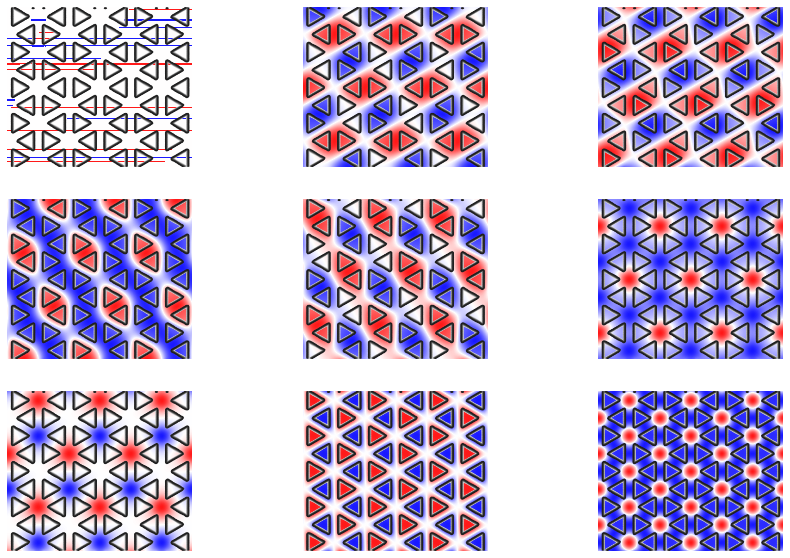

In [26]:
hfields = []

def get_hfields(ms, band):
    hfields.append(ms.get_hfield(band, bloch_phase=True))

ms.run_te(mpb.output_at_kpoint(mp.Vector3(), mpb.fix_hfield_phase,
          get_hfields))

# Create an MPBData instance to transform the hfields
md = mpb.MPBData(rectify=True, resolution=64, periods=3)

converted = []
for f in hfields:
    # Get just the z component of the hfields
    f = f[..., 0, 2]
    converted.append(md.convert(f))

plt.figure(figsize=(15,10))

for i, f in enumerate(converted):
    plt.subplot(331 + i)
    plt.contour(converted_eps.T, cmap='binary')
    plt.imshow(np.real(f).T, interpolation='spline36', cmap='bwr', alpha=0.9)
    plt.axis('off')

plt.show()

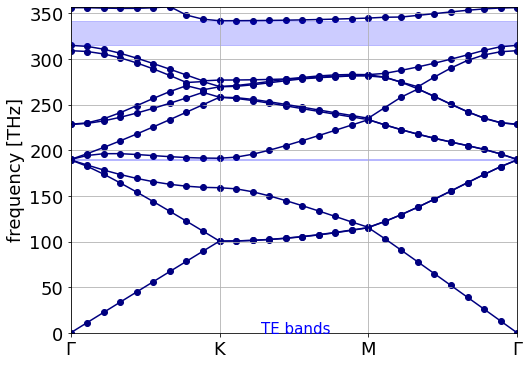

In [27]:
#THz表示
a = 820
c_const = 299792458

fontsize = 18
te_freqs_THz = np.array(te_freqs) * c_const/(a*10**3)
te_gaps_THz = np.array(te_gaps) * c_const/(a*10**3)
#print(te_freqs_THz)



fig, ax = plt.subplots(figsize=(8,6))

x = range(len(te_freqs))

for xz, tez in zip(x, te_freqs_THz):
    ax.scatter([xz]*len(tez), tez, color='navy')

ax.plot(te_freqs_THz, color='navy')
ax.set_ylim([te_freqs_THz.min(), te_freqs_THz.max()])
ax.set_xlim([x[0], x[-1]])

for gap in te_gaps_THz:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

ax.text(11.5, 0, 'TE bands', color='blue', size=15)

points_in_between = (len(te_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'K', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=fontsize)
ax.set_ylabel('frequency [THz]', size=fontsize)
plt.tick_params(labelsize=fontsize)
ax.grid(True)

plt.show()